In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [6]:
data=pd.read_csv("../input/amazon-product-reviews/Reviews.csv")
df=pd.DataFrame(data)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(568454, 10)

In [19]:
df.info

<bound method DataFrame.info of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulness

In [20]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [11]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [22]:
df[['Score']].describe()

,Score
count,568411.000000
mean,4.183309
std,1.310368
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


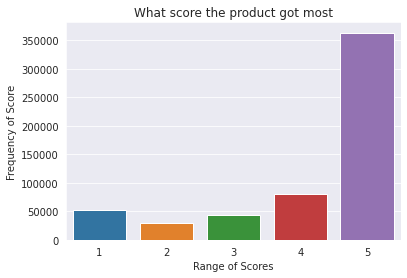

In [7]:
sns.set_style("darkgrid")
sns.countplot(x=df.Score)
plt.title("What score the product got most")
plt.ylabel("Frequency of Score")
plt.xlabel("Range of Scores")

plt.show()

In [10]:
sentiments = SentimentIntensityAnalyzer()

In [11]:
df["Positive Reviews"] = [sentiments.polarity_scores(i)["pos"] for i in df["Text"]]
df["Negative Reviews"] = [sentiments.polarity_scores(i)["neg"] for i in df["Text"]]
df["Neutral Reviews"] = [sentiments.polarity_scores(i)["neu"] for i in df["Text"]]

In [21]:
a=sum(df["Positive Reviews"])
b=sum(df["Negative Reviews"])
c=sum(df["Neutral Reviews"])
total=a+b+c
print(f"Number of all reviews is {total} reviews ")
print("-" *50)
print(f"Sum of Positive Results is {a}")
print("-" *50)
print(f"Sum of Negative Results is {b}")
print("-" *50)
print(f"Sum of Neutral Results is {c}")
print("-" *50)

if (a>b) and (a>c):
    print("The prodcut reviews are POSITIVE")
    
elif (b>a) and (b>c):
    print("The product reviews are NEGATIVE")
    
else:
    print("The product reviws are NEUTRAL")


Number of all reviews is 568448.0819999883 reviews 
--------------------------------------------------
Sum of Positive Results is 109333.99799999926
--------------------------------------------------
Sum of Negative Results is 24035.91299999957
--------------------------------------------------
Sum of Neutral Results is 435078.17099998944
--------------------------------------------------
The product reviws are NEUTRAL


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
Positive=a
Negative=b
Neutral=c
data={'Type of Review':['Positive','Negative','Neutral'],
      'Value':[a,b,c]
    
}

tab=pd.DataFrame(data)
tab.head()

,Type of Review,Value
0,Positive,109333.998
1,Negative,24035.913
2,Neutral,435078.171


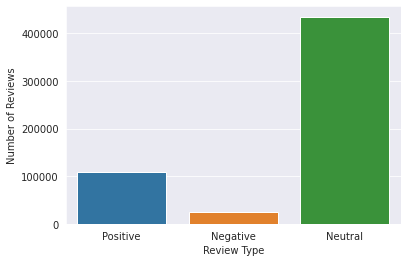

In [91]:
sns.barplot(data=tab,x='Type of Review',y='Value')
plt.xlabel("Review Type")
plt.ylabel("Number of Reviews")
plt.show()